# 神经网络入门:分类与回归

## 4.1 二分类问题 binary classification

### 4.1 加载IMDB数据集
`互联网电影数据库`

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_lables), (test_data, test_lables) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_lables[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### 4.2 将评论解码为文本

In [6]:
# word_index 是一个将单词映射为整数索引的字典
word_index = imdb.get_word_index()

# 将字典的键和值交换, 将整数索引映射为单词
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 对评论区解码。
# 注意：索引减去了3, 因为 0:padding; 1:start of sequence; 2:unknown.
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### 4.3 用multi-hot编码对整数序列进行编码

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 创建一个形状为(len(sequences), dimension)的零矩阵
    results = np.zeros((len(sequences), dimension))

    for i, sequences in enumerate(sequences):
        for j in sequences:
            # 将result[i]某些索引对应的值设为1
            results[i, j] = 1
    
    return results

# 将训练数据向量化
x_train = vectorize_sequences(train_data)
# 将测试数据向量化
x_test  = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 将标签向量化
y_train = np.asarray(train_lables).astype("float32")
y_test  = np.asarray(test_lables).astype("float32")

### 4.4 模型定义

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# 两个中间层, 每层16个单元
# 第三层输出一个标量预测值, 代表当前评论的情感类别
model = keras.Sequential([
    layers.Dense(16, activation="relu"),    # output = relu(dot(input, W) + b)
    layers.Dense(16, activation="relu"),
    layers.Dense(1,  activation="sigmoid")
])

### 4.5 编译模型

In [11]:
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

### 4.6 留出验证集

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 4.7 训练模型

In [13]:
# 使用由512个样本组成的小批量，对模型训练20轮
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5482 - accuracy: 0.7684 - val_loss: 0.4198 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3420 - accuracy: 0.8917 - val_loss: 0.3352 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2579 - accuracy: 0.9134 - val_loss: 0.2882 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2065 - accuracy: 0.9315 - val_loss: 0.2816 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1743 - accuracy: 0.9444 - val_loss: 0.2763 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1491 - accuracy: 0.9523 - val_loss: 0.3158 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1269 - accuracy: 0.9618 - val_loss: 0.2937 - val_accuracy: 0.8850
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()  # 包含4个条目 ['loss', 'accuracy', 'val_loss', 'val_accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 4.8 绘制训练损失和验证损失

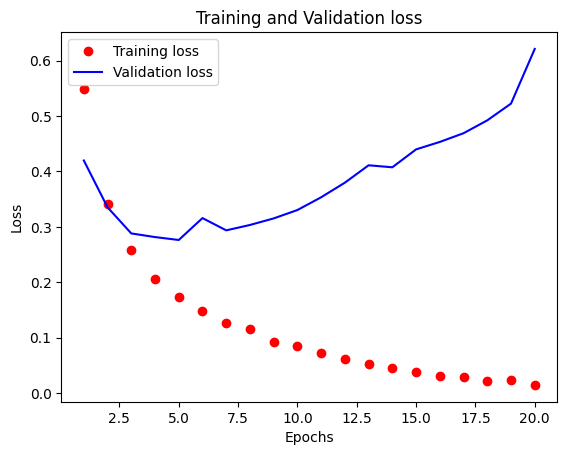

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values  = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values,     "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b",  label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4.9 绘制训练精度和验证精度

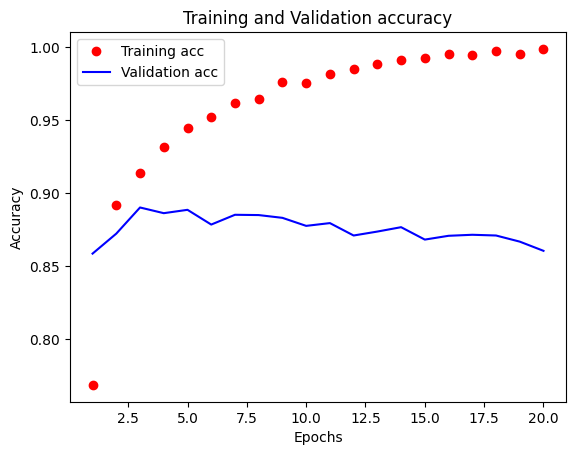

In [16]:
plt.clf()  # 清空图像
acc     = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc,     "ro", label="Training acc")
plt.plot(epochs, val_acc, "b",  label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**训练损失每轮都在减少，训练精度每轮都在提高。需要值得关注的是：模型在训练数据上的表现越来越好，但在前所未见的数据上不一定表现得越来越好。**
**出现了过拟合（overfit）**

### 4.10 从头开始训练一个模型

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1 , activation='sigmoid'),
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4520 - accuracy: 0.8115
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2696 - accuracy: 0.9041
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2096 - accuracy: 0.9248
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3043 - accuracy: 0.8775


In [18]:
results

# [0.30818453431129456, 0.8758000135421753]
# [测试损失, 测试精度]

[0.3042604625225067, 0.8774799704551697]

In [19]:
# 预测
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.14445238],
       [0.9995615 ],
       [0.7178572 ],
       ...,
       [0.06725901],
       [0.06538939],
       [0.4351249 ]], dtype=float32)

## 4.2 多分类问题 multiclass classification

### 4.11 加载路透社数据集
`reuters`

In [20]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [21]:
# 8982个训练样本
len(train_data)

8982

In [22]:
# 2246个测试样本
len(test_data)

2246

In [23]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

### 4.12 将新闻解码为文本

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 注意：索引减去了3, 因为 0:padding; 1:start of sequence; 2:unknown.
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [25]:
train_labels[10]

3

### 4.13 编码输入数据 - 将数据向量化

In [26]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

### 4.14 编码标签
### 标签向量化有两种方法：既可以将标签列表转换为一个整数张量，也可以使用 one-hot 编码。
### one-hot编码也叫分类编码 `categorical encoding`

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, labels in enumerate(labels):
        results[i, labels] = 1.
    
    return results

# 将标签向量化
y_train = to_one_hot(train_labels)
y_test  = to_one_hot(test_labels)

In [28]:
# keras有一个内置方法可以实现这种编码
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels)

### 4.15 模型定义

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')  # 输出一个在46个输出类别上的概率分布
])

### 4.16 编译模型

In [30]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 4.17 留出验证集

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### 4.18 训练模型

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.6645 - accuracy: 0.4535 - val_loss: 1.8093 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.5296 - accuracy: 0.6824 - val_loss: 1.3824 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1822 - accuracy: 0.7462 - val_loss: 1.2112 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.9668 - accuracy: 0.7940 - val_loss: 1.0898 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8086 - accuracy: 0.8281 - val_loss: 1.0288 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6725 - accuracy: 0.8554 - val_loss: 0.9708 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5667 - accuracy: 0.8811 - val_loss: 0.9265 - val_accuracy: 0.8080
Epoch 8/20
16

### 4.19 绘制训练损失和验证损失

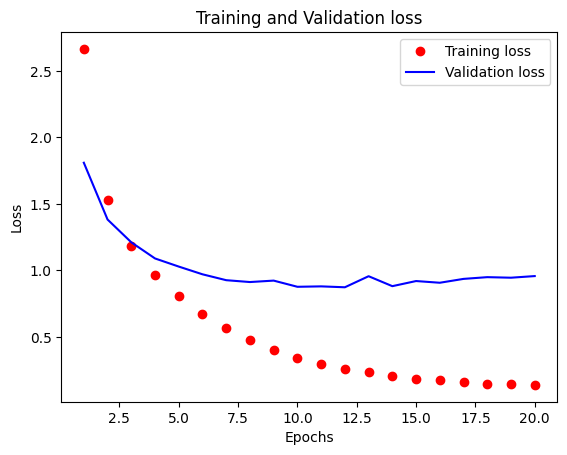

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss,     "ro", label="Training loss")
plt.plot(epochs, val_loss, "b",  label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4.20 绘制训练精度和验证精度

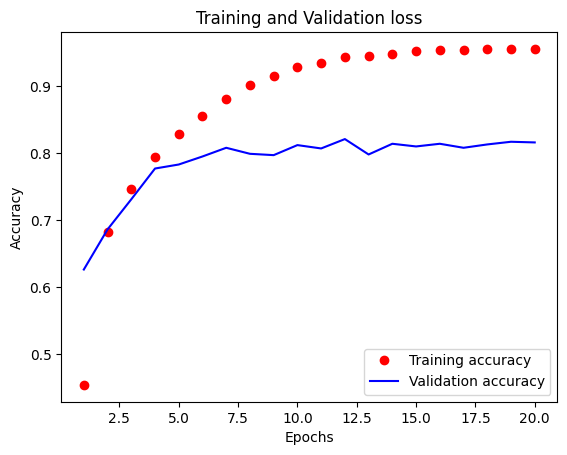

In [34]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc,     "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b",  label="Validation accuracy")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 4.21 从头开始训练一个模型

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 20ms/step - loss: 2.6244 - accuracy: 0.4955
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.4520 - accuracy: 0.6888
Epoch 3/9
18/18 [==============================] - 0s 21ms/step - loss: 1.1154 - accuracy: 0.7600
Epoch 4/9
18/18 [==============================] - 0s 22ms/step - loss: 0.9173 - accuracy: 0.8016
Epoch 5/9
18/18 [==============================] - 0s 23ms/step - loss: 0.7634 - accuracy: 0.8359
Epoch 6/9
18/18 [==============================] - 0s 23ms/step - loss: 0.6394 - accuracy: 0.8627
Epoch 7/9
18/18 [==============================] - 0s 23ms/step - loss: 0.5333 - accuracy: 0.8855
Epoch 8/9
18/18 [==============================] - 0s 23ms/step - loss: 0.4531 - accuracy: 0.9031
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9063 - accuracy: 0.7921


In [37]:
results

[0.906318724155426, 0.7920747995376587]

In [38]:
import copy

test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)

hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19545859305431879

### 对新数据进行预测

In [41]:
# 对所有测试数据生成预测
predictions = model.predict(x_test)

# 向量
predictions[0].shape

# 求和, 概率分布
np.sum(predictions[0])

#
np.argmax(predictions[0])

71/71 [==============================] - 0s 2ms/step


3

### 处理标签和损失的另一种方法

In [42]:
y_train = np.array(train_labels)
y_test  = np.array(test_labels)

# sparse_categorical_crossentropy : 稀疏分类交叉熵
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 4.22 具有信息瓶颈的模型

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4,  activation='relu'),    # ?? 信息瓶颈
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))


Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 2.9229 - accuracy: 0.1825 - val_loss: 2.2337 - val_accuracy: 0.2780
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.8257 - accuracy: 0.5804 - val_loss: 1.6221 - val_accuracy: 0.5990
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4207 - accuracy: 0.6243 - val_loss: 1.4471 - val_accuracy: 0.6280
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2320 - accuracy: 0.6681 - val_loss: 1.3639 - val_accuracy: 0.6780
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1007 - accuracy: 0.7140 - val_loss: 1.3670 - val_accuracy: 0.6730
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0048 - accuracy: 0.7330 - val_loss: 1.3293 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9248 - accuracy: 0.7536 - val_loss: 1.3146 - val_accuracy: 0.7030
Epoch 8/20
63

## 4.3 标量归问题示例

### 4.23 加载波士顿房价数据集

In [48]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [45]:
train_data.shape

(404, 13)

In [46]:
test_data.shape

(102, 13)

In [47]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 4.24 数据标准化

In [49]:
mean = train_data.mean(axis=0)

train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data  -= mean
test_data  /= std

### 4.25 模型定义

In [51]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    # mse : 损失函数, 均方误差(mean squared error)
    # mae : 监控指标, 平均绝对误差(mean absolute error)
    # 如果MAE等于0.5, 就表示预测房价与实际价格平均相差500美元
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

### 4.26 利用κ折交叉验证来验证

In [54]:
# 将数据划分为 K 个分区
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")

    # 准备验证数据:第k个分区的数据
    val_data    = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    # 准备训练数据:其余所有分区的数据
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)

    # 验证数据上评估模型
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [55]:
all_scores

[2.0773367881774902, 2.44350528717041, 2.472440481185913, 2.5285441875457764]

In [56]:
np.mean(all_scores)

2.3804566860198975

### 4.27 保持每折的验证分数

In [59]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")

    # 准备验证数据:第k个分区的数据
    val_data    = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    # 准备训练数据:其余所有分区的数据
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


### 4.28 计算每轮的κ折验证分数平均值

In [61]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### 4.29 绘制验证MAE曲线

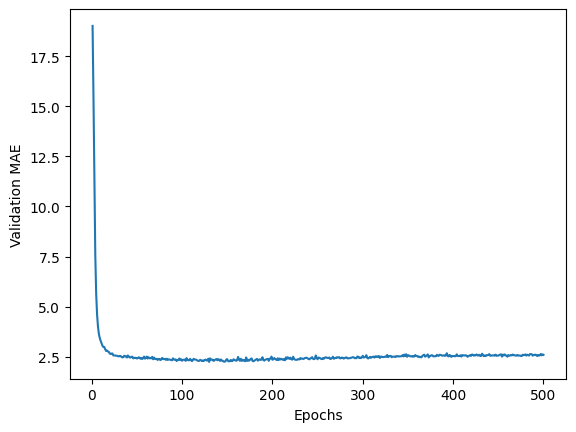

In [62]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 4.30 绘制验证MAE曲线（剔除前10个数据点）

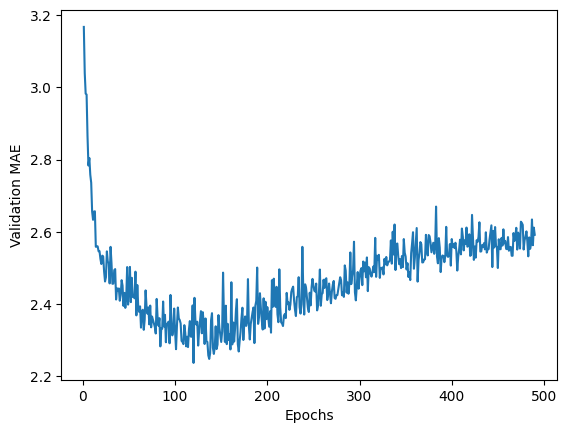

In [63]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 4.31 训练最终模型

In [64]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 12.8628 - mae: 2.3716


In [65]:
test_mae_score

2.3715975284576416

In [75]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1ms/step


array([8.261114], dtype=float32)